## Deep Learning

### Preparation

In [1]:
import numpy as np

a = np.arange(10)
a[a>5]

array([6, 7, 8, 9])

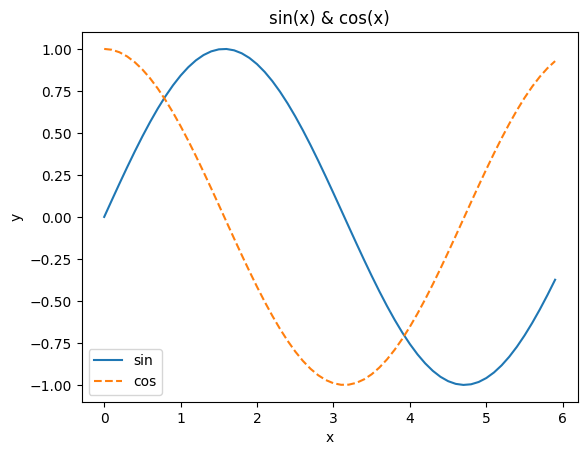

In [2]:
import matplotlib.pyplot as plt

x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, label='sin')
plt.plot(x, y2, linestyle='--', label='cos')
plt.title('sin(x) & cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

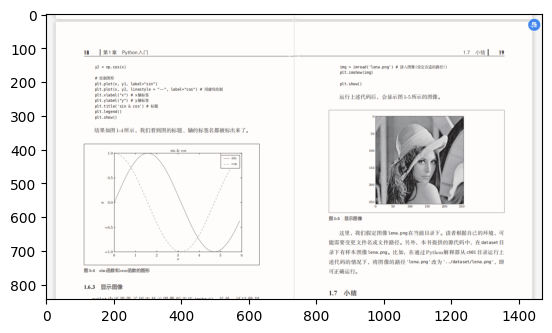

In [4]:
from matplotlib.image import *

img = plt.imread('./img/test1.png')
plt.imshow(img)
plt.show()

### Chapter 2

In [5]:
def AND(x1, x2): # and gate
    w1, w2, theta = 0.5, 0.5, 0.8
    return int(w1 * x1 + w2 * x2 >= theta)

In [6]:
AND(1, 1)

1

In [7]:
def AND_2(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.8
    return int(np.sum(w * x) + b > 0)

In [8]:
AND_2(1, 1)

1

### Chapter 3

In [9]:
def step_function(x):
    if not isinstance(x, np.ndarray):
        x = np.array(x) 
    y = x > 0    
    return y.astype(np.int32)

In [10]:
x = np.array([-1, 0, 2, 3])
step_function(x)
# isinstance(x, np.ndarray)

array([0, 0, 1, 1])

In [11]:
def step_function(x):
    return np.array(x > 0, dtype=np.int32)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

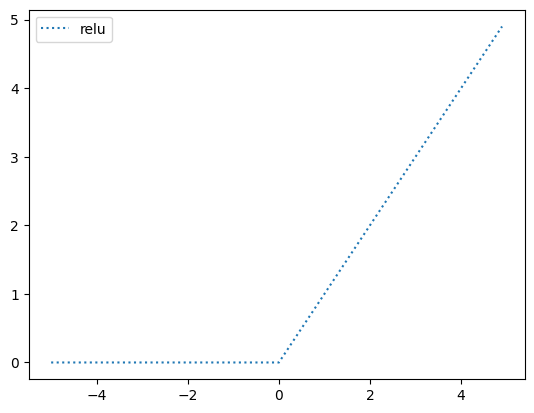

In [12]:
x = np.arange(-5, 5, 0.1)
y1 = step_function(x)
y2 = sigmoid_function(x)
y3 = relu(x)
# plt.plot(x, y1, label='step')
# plt.plot(x, y2, linestyle='--', label='sigmoid')
plt.plot(x, y3, linestyle=':', label='relu')
# plt.ylim([-0.1, 1.1])
plt.legend()
plt.show()

In [13]:
A = np.reshape(np.arange(4), (2, 2))
B = 2*A
A@B == np.dot(A, B)  # dot点积是矩阵的向量积

array([[ True,  True],
       [ True,  True]])

In [14]:
def identify_function(x): # 恒等函数
    return x

In [15]:
def softmax(x):
    m = np.max(x)
    exp = np.exp(x - m)
    res = exp / np.sum(exp) # np.sum()很容易发生溢出
    return res

In [16]:
a = np.array([0.3, 2.9, 4.0])
np.sum(softmax(a), keepdims=True)

array([1.])

In [17]:
a = np.array([1010, 1000, 990])
# sum(softmax(a))


In [18]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [19]:
i = np.reshape(x_train[0], (28, 28))

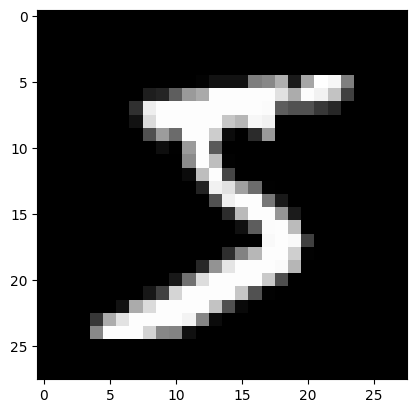

In [20]:
plt.imshow(i, cmap='gray')

In [21]:
from PIL import Image

def img_show(img):
    p_img = Image.fromarray(np.uint8(img))
    p_img.show()
    
img_show(np.reshape(x_train[0], (28, 28)))

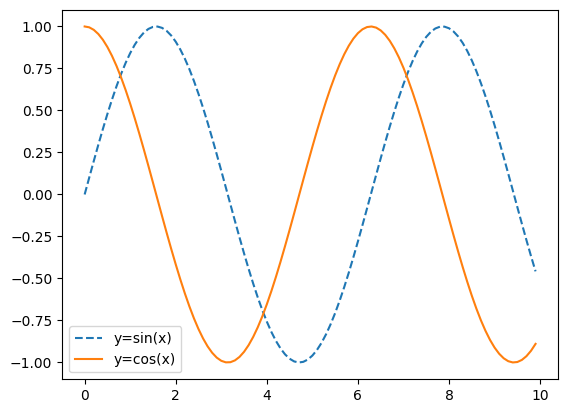

In [22]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0, 10, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, label='y=sin(x)', linestyle='--')
plt.plot(x, y2, label='y=cos(x)')
plt.legend()
plt.show()

In [23]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)


In [24]:
def function_1(x):
 return 0.01*x**2 + 0.1*x

def numerical_diff(f, x):
 h = 1e-4 # 0.0001
 return (f(x+h) - f(x-h)) / (2*h)

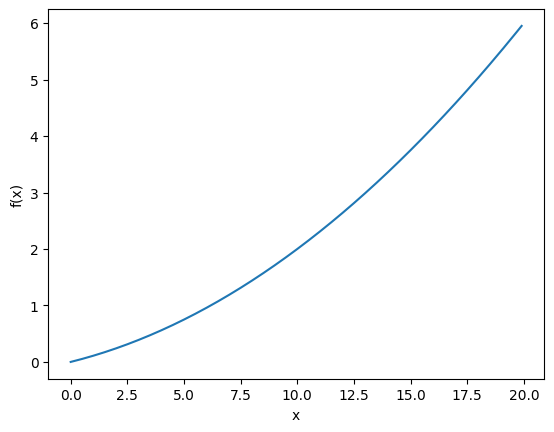

In [25]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1) # 以0.1为单位，从0到20的数组x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

### Excercise

In [1]:
import torch
from torch.utils import data
from torch import nn
import torchvision
from torchvision import transforms

In [2]:
# dataset loder
def load_dataset( data_set='MNIST', batch_size=20, shuffle=True, num_works=1, download=True):
    trans = transforms.ToTensor()
    if data_set == 'MNIST':
        train = torchvision.datasets.MNIST(
            root='./data', train=True, transform=trans, download=download
        )
        test = torchvision.datasets.MNIST(
            root='./data', train=False, transform=trans, download=download
        )
    return (data.DataLoader(train, batch_size=batch_size, shuffle=shuffle, num_workers=num_works),
            data.DataLoader(test, batch_size=batch_size, shuffle=False, num_workers=num_works))

In [ ]:
def MLP():
    return nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

In [28]:
# network model
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)


def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

# init the model
net.apply(init_weights)

# loss function
loss = nn.CrossEntropyLoss()  # 交叉熵损失函数
# optimizer
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

def train_m(net, train_iter, updater, loss, num_epochs):
    # assert isinstance(net, nn.Module)
    net.train()
    for i in range(num_epochs):
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y)
            updater.zero_grad()  # 梯度清零
            l.mean().backward()  # 误差反向传播
            updater.step()  # 损失函数梯度下降
        print(f'epoch {i+1}, train set loss:{l}')

def evaluate_m(net, test_iter):
    net.eval()
    with torch.no_grad():
        num_all = 0
        num_correct = 0
        for X, y in test_iter:
            t = net(X).argmax(axis=1) == y
            num_all += len(t)
            num_correct += torch.sum(t)
    acc = num_correct / num_all
    print(f'evaluation, accuracy:{acc}')

In [24]:
train_iter, test_iter = load_dataset(data_set='MNIST', batch_size=20, shuffle=True, download=True)
train_m(net, train_iter, trainer, loss, num_epochs=10)

epoch 1, train set loss:0.1261560320854187
epoch 2, train set loss:0.17829076945781708
epoch 3, train set loss:0.10640092939138412
epoch 4, train set loss:0.0182407945394516
epoch 5, train set loss:0.012747867032885551
epoch 6, train set loss:0.019041437655687332
epoch 7, train set loss:0.0847281962633133
epoch 8, train set loss:0.0038812276907265186
epoch 9, train set loss:0.019710998982191086
epoch 10, train set loss:0.000505979114677757


In [29]:
net_clone = MLP()
net_clone.load_state_dict(torch.load('net.pt'))

<All keys matched successfully>

In [25]:
torch.save(net.state_dict(), 'net.pt')

In [30]:
evaluate_m(net, test_iter)
evaluate_m(net_clone, test_iter)

evaluation, accuracy:0.10090000182390213
evaluation, accuracy:0.9781000018119812
